In [1]:
ENV["PYTHON"] ="/home/admin2/miniconda3/bin/python"

"/home/admin2/miniconda3/bin/python"

In [2]:
using CUDA; 
using Knet
using MLDatasets
using LinearAlgebra
using PyPlot
using JLD
include("resnet34_new.jl")

ResNet34 (generic function with 1 method)

In [3]:
#To supress dozens of Tensorflow logs.
py"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
"""

In [4]:
tf = pyimport("tensorflow")
tfds = pyimport("tensorflow_datasets")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")

PyObject <module 'matplotlib.pyplot' from '/home/admin2/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [5]:
pushfirst!(PyVector(pyimport("sys")."path"), "")

PyObject ['', '/home/admin2/miniconda3/lib/python37.zip', '/home/admin2/miniconda3/lib/python3.7', '/home/admin2/miniconda3/lib/python3.7/lib-dynload', '/home/admin2/miniconda3/lib/python3.7/site-packages', '/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions']

In [6]:
PyVector(pyimport("sys")."path")

6-element PyVector{PyAny}:
 ""
 "/home/admin2/miniconda3/lib/python37.zip"
 "/home/admin2/miniconda3/lib/python3.7"
 "/home/admin2/miniconda3/lib/python3.7/lib-dynload"
 "/home/admin2/miniconda3/lib/python3.7/site-packages"
 "/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions"

In [7]:
data_util = pyimport("data_util2")

PyObject <module 'data_util2' from '/home/admin2/workspace/ku/comp541_project/data_util2.py'>

In [8]:
xtrn,ytrn = CIFAR10.traindata(Float32);
xtrn = permutedims(xtrn, (4, 2, 1, 3));
xtst,ytst = CIFAR10.testdata(Float32);
xtst = permutedims(xtst, (4, 2, 1, 3));

In [8]:
xtrn,ytrn = CIFAR10.traindata(Float32);
xtrn = permutedims(xtrn, (2, 1, 3, 4));
xtst,ytst = CIFAR10.testdata(Float32);
xtst = permutedims(xtst, (2, 1, 3, 4));

In [9]:
bsize=8

8

In [19]:
xtrn

32×32×3×50000 Array{Float32,4}:
[:, :, 1, 1] =
 0.231373   0.168627   0.196078   0.266667  …  0.619608  0.596078  0.580392
 0.0627451  0.0        0.0705882  0.2          0.482353  0.466667  0.478431
 0.0980392  0.0627451  0.192157   0.32549      0.462745  0.470588  0.427451
 0.129412   0.14902    0.341176   0.415686     0.490196  0.47451   0.368627
 0.196078   0.231373   0.4        0.498039     0.341176  0.294118  0.262745
 0.278431   0.329412   0.431373   0.505882  …  0.262745  0.137255  0.12549
 0.380392   0.435294   0.482353   0.509804     0.376471  0.34902   0.258824
 0.45098    0.466667   0.509804   0.54902      0.396078  0.494118  0.4
 0.537255   0.501961   0.517647   0.501961     0.466667  0.490196  0.52549
 0.603922   0.603922   0.611765   0.54902      0.517647  0.501961  0.521569
 0.603922   0.607843   0.611765   0.576471  …  0.533333  0.509804  0.52549
 0.568627   0.572549   0.572549   0.529412     0.521569  0.517647  0.521569
 0.556863   0.552941   0.54902    0.564706     0.

In [16]:
print(size(xtrn[:,:,:,1]))

(32, 32, 3)

In [14]:
for x in xtrn
    print(xtrn[:,:,:,1]
    break
end

0.23137255

In [87]:
temp = Array{nothing}(32,32,3,1)

LoadError: MethodError: no method matching Array{nothing,N} where N(::Int64, ::Int64, ::Int64, ::Int64)
Closest candidates are:
  Array{nothing,N} where N(!Matched::UndefInitializer, ::Int64, ::Int64, ::Int64) where T at boot.jl:422
  Array{nothing,N} where N(!Matched::UndefInitializer, ::Integer, ::Integer, ::Integer) where T at baseext.jl:18
  Array{nothing,N} where N(!Matched::UndefInitializer, ::Integer...) where T at baseext.jl:19
  ...

In [111]:
#Array{Float64}(undef, 32,32,3,1)

In [90]:
temp = []

Any[]

In [ ]:
julia> xs = [rand(28, 28, 1, 1) for _ in 1:60000];

julia> X = zeros(28, 28, 1, 60000);

julia> for i in 1:length(xs)
           X[:, :, 1:1, i:i] .= xs[i]
       end




In [105]:
X = zeros(32, 32, 6, 50000);

In [106]:
for i in 1:50000
    xs1 = data_util[:preprocess_image](Array(xtrn[:,:,:,i]), 32, 32, is_training=true).numpy()
    xs2 = data_util[:preprocess_image](Array(xtrn[:,:,:,i]), 32, 32, is_training=true).numpy()
    xs = cat(xs1, xs2, dims=3)
    #xs = cat(xs; dims=4)
    X[:, :, :, i] = xs
    #cat(temp, xs; dims=4)
    #return X
    #break
    #return temp #size(cat(xs,dims=4))
end

In [107]:
X

32×32×6×50000 Array{Float64,4}:
[:, :, 1, 1] =
 0.561822  0.551049  0.565413  0.601323  …  0.188361  0.123723  0.178719
 0.523884  0.554007  0.54753   0.591676     0.278255  0.169505  0.208059
 0.482063  0.574966  0.580661  0.600397     0.403455  0.236348  0.230415
 0.409514  0.468588  0.494858  0.53445      0.476431  0.303761  0.274883
 0.280941  0.287562  0.377673  0.455215     0.50504   0.378458  0.337947
 0.260301  0.294745  0.392771  0.440502  …  0.537052  0.468273  0.416351
 0.398854  0.494001  0.481236  0.472875     0.575779  0.53792   0.493762
 0.511326  0.585237  0.493976  0.511387     0.592221  0.555531  0.548954
 0.604914  0.572595  0.551049  0.579777     0.597732  0.583368  0.615687
 0.602619  0.58169   0.592486  0.598593     0.674984  0.667051  0.671165
 0.604353  0.588544  0.611619  0.616725  …  0.690733  0.686202  0.682288
 0.602854  0.594039  0.605363  0.616657     0.663313  0.661861  0.657244
 0.599303  0.605587  0.601547  0.608842     0.633193  0.631622  0.630612
 ⋮  

In [113]:
save("preprocessed_train.jld", "data", X)

In [118]:
X

32×32×6×50000 Array{Float64,4}:
[:, :, 1, 1] =
 0.561822  0.551049  0.565413  0.601323  …  0.188361  0.123723  0.178719
 0.523884  0.554007  0.54753   0.591676     0.278255  0.169505  0.208059
 0.482063  0.574966  0.580661  0.600397     0.403455  0.236348  0.230415
 0.409514  0.468588  0.494858  0.53445      0.476431  0.303761  0.274883
 0.280941  0.287562  0.377673  0.455215     0.50504   0.378458  0.337947
 0.260301  0.294745  0.392771  0.440502  …  0.537052  0.468273  0.416351
 0.398854  0.494001  0.481236  0.472875     0.575779  0.53792   0.493762
 0.511326  0.585237  0.493976  0.511387     0.592221  0.555531  0.548954
 0.604914  0.572595  0.551049  0.579777     0.597732  0.583368  0.615687
 0.602619  0.58169   0.592486  0.598593     0.674984  0.667051  0.671165
 0.604353  0.588544  0.611619  0.616725  …  0.690733  0.686202  0.682288
 0.602854  0.594039  0.605363  0.616657     0.663313  0.661861  0.657244
 0.599303  0.605587  0.601547  0.608842     0.633193  0.631622  0.630612
 ⋮  

In [18]:
xs = Array{Float64}
for i in 1:50000
    for t in 1:2  # Two transformations
        push!(xs, mat(data_util[:preprocess_image](Array(xtrn[:,:,:,i]), 32, 32, is_training=true).numpy()))
    end
    return xs#size(cat(xs,dims=4))
    break
end

2-element Array{Any,1}:
 Float32[0.6723096 0.30985653 0.124864936; 0.68933195 0.35059085 0.17500734; … ; 0.6188964 0.33691257 0.17167988; 0.6194914 0.3385824 0.17491734]
 Float32[0.022112936 0.022112936 0.022112936; 0.0 0.0 0.0; … ; 0.06501598 0.06501598 0.06501598; 0.15119693 0.15119693 0.15119693]

In [132]:
ytrn

50000-element Array{Int64,1}:
 6
 9
 9
 4
 1
 1
 2
 7
 8
 3
 4
 7
 7
 ⋮
 5
 1
 4
 2
 0
 1
 0
 2
 6
 9
 1
 1

In [133]:
dtrn = minibatch(X, ytrn, bsize, xsize=(size(xtrn)[1], size(xtrn)[2], 6, bsize))

6250-element Knet.Train20.Data{Tuple{KnetArray{Float32,N} where N,Array{Int64,N} where N}}

In [130]:
dtrn

6250-element Knet.Train20.Data{Tuple{KnetArray{Float32,N} where N,Array{Int64,N} where N}}

In [131]:
for (x,y) in dtrn
    print(size(x))
    break
end

(32, 32, 6, 8)

In [152]:
function loss_contrastive(model, x)
    
    LARGE_NUM = 1e9
    temperature = 1.0
    weights = 1.0
    
    z = model(x)
    
    z = transpose(z)
    
    _atype = KnetArray{Float32}
    
    norm_z = sqrt.(sum(abs2,z,dims=2))
    
    zx = z ./ norm_z

    
    bs = size(zx)[1]÷2
    z1 = zx[1:bs,:]
    z2 = zx[bs+1:bs*2,:]
    
    n = size(z1)[1]
    
    labels = convert(_atype, Array{Float64}(I, n, n*2))
    mask = convert(_atype, Array{Float64}(I, n, n)*LARGE_NUM)

    logits_aa = z1*transpose(z1) - mask
    logits_bb = z2*transpose(z2) - mask
    logits_ab = z1*transpose(z2)
    logits_ba = z2*transpose(z1)
    
    loss_a = sum(-labels.*logsoftmax([logits_ab logits_aa], dims=2))/n
    loss_b = sum(-labels.*logsoftmax([logits_ba logits_bb], dims=2))/n
    
    loss = loss_a + loss_b
    
    loss
end

loss_contrastive (generic function with 1 method)

In [153]:
bsize = 8

8

In [154]:
model = SequentialModule(ResNet34(pretrained=false, in_channels=6, out_channels=512),DenseLayer(512,128,fn=relu))

SequentialModule((SequentialModule(Any[ConvLayer(P(KnetArray{Float32,4}(7,7,6,64)), nothing, 3, 2, identity), BNormLayer2d(Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), K32(128)[1.0⋯]), var"#9#12"(), PoolLayer(3, 2, 1, 0), SequentialModule(Any[BasicBlock(SequentialModule(Any[ConvLayer(P(KnetArray{Float32,4}(3,3,64,64)), nothing, 1, 1, identity), BNormLayer2d(Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), K32(128)[1.0⋯]), var"#6#7"(), ConvLayer(P(KnetArray{Float32,4}(3,3,64,64)), nothing, 1, 1, identity), BNormLayer2d(Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), K32(128)[1.0⋯])]), identity), BasicBlock(SequentialModule(Any[ConvLayer(P(KnetArray{Float32,4}(3,3,64,64)), nothing, 1, 1, identity), BNormLayer2d(Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), K32(128)[1.0⋯]), var"#6#7"(), ConvLayer(P(KnetArray{Float32,4}(3,3,64,64)), nothing, 1, 1, identity), BNormLayer2d(Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), K32(128)[1.0⋯])]),

In [155]:
for p in params(model)
    p.opt = Adam(lr=0.001)
end

In [156]:
epochs = 10
train_loss = zeros(epochs);

In [158]:
dtrn

6250-element Knet.Train20.Data{Tuple{KnetArray{Float32,N} where N,Array{Int64,N} where N}}

In [159]:
for i in 1:epochs
    println("Epoch ", i)
    train_loss[i] = 0.0
    batch_count = 0
    for (x, y) in dtrn
        loss = @diff loss_contrastive(model, x)
        train_loss[i] += value(loss)
        batch_count += 1
        for p in params(model)
            g = grad(loss, p)
            update!(value(p), g, p.opt)
        end
    end
    train_loss[i] /= batch_count
    println("Train epoch loss: ", train_loss[i])
    #GC.gc()
end

Epoch 1


LoadError: Out of GPU memory trying to allocate 9.000 MiB
Effective GPU memory usage: 99.97% (15.894 GiB/15.899 GiB)
CUDA allocator usage: 749.678 MiB
binned usage: 749.178 MiB (749.178 MiB allocated, 0 bytes cached)
Discrepancy of 512.000 KiB between memory pool and allocator!


In [144]:
GC.gc()

In [173]:
cat(X[:,:,1:3,:], X[:,:,4:6,:], dims=4)

32×32×3×100000 Array{Float64,4}:
[:, :, 1, 1] =
 0.561822  0.551049  0.565413  0.601323  …  0.188361  0.123723  0.178719
 0.523884  0.554007  0.54753   0.591676     0.278255  0.169505  0.208059
 0.482063  0.574966  0.580661  0.600397     0.403455  0.236348  0.230415
 0.409514  0.468588  0.494858  0.53445      0.476431  0.303761  0.274883
 0.280941  0.287562  0.377673  0.455215     0.50504   0.378458  0.337947
 0.260301  0.294745  0.392771  0.440502  …  0.537052  0.468273  0.416351
 0.398854  0.494001  0.481236  0.472875     0.575779  0.53792   0.493762
 0.511326  0.585237  0.493976  0.511387     0.592221  0.555531  0.548954
 0.604914  0.572595  0.551049  0.579777     0.597732  0.583368  0.615687
 0.602619  0.58169   0.592486  0.598593     0.674984  0.667051  0.671165
 0.604353  0.588544  0.611619  0.616725  …  0.690733  0.686202  0.682288
 0.602854  0.594039  0.605363  0.616657     0.663313  0.661861  0.657244
 0.599303  0.605587  0.601547  0.608842     0.633193  0.631622  0.630612
 ⋮ 

In [170]:
size(reduce(hcat, X[:,:,1:3,1:10]))

(1, 61440)

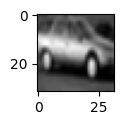

PyObject <matplotlib.image.AxesImage object at 0x7f8eac090910>

In [127]:
plt.figure(figsize=(1,1))
plt.imshow(X[:,:,1:3,5])

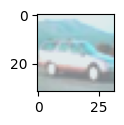

PyObject <matplotlib.image.AxesImage object at 0x7f8eac090ad0>

In [128]:
plt.figure(figsize=(1,1))
plt.imshow(X[:,:,4:6,5])

In [11]:
xs = []
for (x, y) in dtrn
    print(x[:,:,:,1])
    for t in 1:2  # Two transformations
        push!(xs, mat(data_util[:preprocess_image](Array(x[:,:,:,1]), 32, 32, is_training=true).numpy()))
    end
    return size(cat(xs,dims=4))
    break
end
        

K32(32,32,3)[0.23137255⋯]WARNING:tensorflow:From /home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


(2, 1, 1, 1)

In [12]:
xs

2-element Array{Any,1}:
 Float32[0.55906636 0.45513082 0.30258542; 0.59934586 0.48139822 0.32220376; … ; 0.8901082 0.7894182 0.5505123; 0.7939179 0.6791835 0.5308261]
 Float32[0.40792006 0.23592335 0.13873225; 0.43125266 0.26194334 0.1386855; … ; 0.21948647 0.054839067 0.046321943; 0.22635502 0.062354013 0.04777153]

In [49]:
? reduce

search: reduce mapreduce



```
reduce(op, itr; [init])
```

Reduce the given collection `itr` with the given binary operator `op`. If provided, the initial value `init` must be a neutral element for `op` that will be returned for empty collections. It is unspecified whether `init` is used for non-empty collections.

For empty collections, providing `init` will be necessary, except for some special cases (e.g. when `op` is one of `+`, `*`, `max`, `min`, `&`, `|`) when Julia can determine the neutral element of `op`.

Reductions for certain commonly-used operators may have special implementations, and should be used instead: `maximum(itr)`, `minimum(itr)`, `sum(itr)`, `prod(itr)`,  `any(itr)`, `all(itr)`.

The associativity of the reduction is implementation dependent. This means that you can't use non-associative operations like `-` because it is undefined whether `reduce(-,[1,2,3])` should be evaluated as `(1-2)-3` or `1-(2-3)`. Use [`foldl`](@ref) or [`foldr`](@ref) instead for guaranteed left or right associativity.

Some operations accumulate error. Parallelism will be easier if the reduction can be executed in groups. Future versions of Julia might change the algorithm. Note that the elements are not reordered if you use an ordered collection.

# Examples

```jldoctest
julia> reduce(*, [2; 3; 4])
24

julia> reduce(*, [2; 3; 4]; init=-1)
-24
```

---

```
reduce(f, A; dims=:, [init])
```

Reduce 2-argument function `f` along dimensions of `A`. `dims` is a vector specifying the dimensions to reduce, and the keyword argument `init` is the initial value to use in the reductions. For `+`, `*`, `max` and `min` the `init` argument is optional.

The associativity of the reduction is implementation-dependent; if you need a particular associativity, e.g. left-to-right, you should write your own loop or consider using [`foldl`](@ref) or [`foldr`](@ref). See documentation for [`reduce`](@ref).

# Examples

```jldoctest
julia> a = reshape(Vector(1:16), (4,4))
4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

julia> reduce(max, a, dims=2)
4×1 Array{Int64,2}:
 13
 14
 15
 16

julia> reduce(max, a, dims=1)
1×4 Array{Int64,2}:
 4  8  12  16
```


In [61]:
size(xs)

(2,)

In [59]:
reduce(vcat, xs)

64×32×3 Array{Float32,3}:
[:, :, 1] =
 0.738146  0.74173   0.722815  0.687888  …  0.607891  0.587314  0.57014
 0.721489  0.7246    0.708185  0.677866     0.624358  0.601013  0.581078
 0.701692  0.704238  0.690797  0.665956     0.643921  0.617289  0.594077
 0.679365  0.681248  0.671309  0.652957     0.662193  0.633583  0.608383
 0.662562  0.663929  0.656741  0.64361      0.672426  0.644197  0.619402
 0.657348  0.658544  0.652295  0.641122  …  0.672461  0.646217  0.623482
 0.646596  0.647389  0.643263  0.63603      0.670809  0.648137  0.628869
 0.620088  0.619836  0.621173  0.623698     0.673313  0.655565  0.640777
 0.595216  0.593784  0.601294  0.614851     0.674727  0.661877  0.651414
 0.567365  0.564895  0.57777   0.600541     0.677828  0.668944  0.661849
 0.531303  0.528178  0.5443    0.571735  …  0.686202  0.679218  0.673522
 0.502816  0.499665  0.515669  0.541281     0.697759  0.688537  0.680533
 0.482045  0.479303  0.492929  0.512778     0.707712  0.695521  0.684552
 ⋮            

In [45]:
[xs[1]; xs[2]]

64×32×3 Array{Float32,3}:
[:, :, 1] =
 0.738146  0.74173   0.722815  0.687888  …  0.607891  0.587314  0.57014
 0.721489  0.7246    0.708185  0.677866     0.624358  0.601013  0.581078
 0.701692  0.704238  0.690797  0.665956     0.643921  0.617289  0.594077
 0.679365  0.681248  0.671309  0.652957     0.662193  0.633583  0.608383
 0.662562  0.663929  0.656741  0.64361      0.672426  0.644197  0.619402
 0.657348  0.658544  0.652295  0.641122  …  0.672461  0.646217  0.623482
 0.646596  0.647389  0.643263  0.63603      0.670809  0.648137  0.628869
 0.620088  0.619836  0.621173  0.623698     0.673313  0.655565  0.640777
 0.595216  0.593784  0.601294  0.614851     0.674727  0.661877  0.651414
 0.567365  0.564895  0.57777   0.600541     0.677828  0.668944  0.661849
 0.531303  0.528178  0.5443    0.571735  …  0.686202  0.679218  0.673522
 0.502816  0.499665  0.515669  0.541281     0.697759  0.688537  0.680533
 0.482045  0.479303  0.492929  0.512778     0.707712  0.695521  0.684552
 ⋮            

In [40]:
size(hcat(xs))

(2, 1)

In [36]:
xs

2-element Array{Any,1}:
 Float32[0.7381458 0.74173015 … 0.5873142 0.5701405; 0.7214894 0.7245996 … 0.60101265 0.5810777; … ; 0.8662781 0.867523 … 0.7187113 0.7138837; 0.8618528 0.8631883 … 0.718927 0.7148643]

Float32[0.38008007 0.3822915 … 0.28376028 0.2832501; 0.36501256 0.36685005 … 0.29128885 0.28963712; … ; 0.51122445 0.51691717 … 0.3962844 0.4018597; 0.5062089 0.5119105 … 0.39601833 0.4020318]

Float32[0.37088582 0.372913 … 0.2923789 0.2897342; 0.35955706 0.36130205 … 0.3009157 0.2973747; … ; 0.4932982 0.50003743 … 0.39350656 0.3993413; 0.48993257 0.4966412 … 0.3931102 0.39942068]
 Float32[0.48519072 0.46445388 … 0.41483438 0.46107477; 0.43861422 0.43961936 … 0.27267683 0.28504637; … ; 0.65935355 0.6275432 … 0.43814063 0.42824638; 0.71334416 0.6887827 … 0.43909627 0.4170087]

Float32[0.28749096 0.2649165 … 0.21712343 0.23946546; 0.26425803 0.25981593 … 0.11004976 0.111453444; … ; 0.5441846 0.50916326 … 0.25267535 0.24592906; 0.59235173 0.57366353 … 0.24679865 0.22326986]

Float32

In [12]:
? minibatch

search: minibatch



```
minibatch(x, [y], batchsize; shuffle, partial, xtype, ytype, xsize, ysize)
```

Return an iterator of minibatches [(xi,yi)...] given data tensors x, y and batchsize.  

The last dimension of x and y give the number of instances and should be equal. `y` is optional, if omitted a sequence of `xi` will be generated rather than `(xi,yi)` tuples.  Use `repeat(d,n)` for multiple epochs, `Iterators.take(d,n)` for a partial epoch, and `Iterators.cycle(d)` to cycle through the data forever (this can be used with `converge`). If you need the iterator to continue from its last position when stopped early (e.g. by a break in a for loop), use `Iterators.Stateful(d)` (by default the iterator would restart from the beginning).

Keyword arguments:

  * `shuffle=false`: Shuffle the instances every epoch.
  * `partial=false`: If true include the last partial minibatch < batchsize.
  * `xtype=typeof(x)`: Convert xi in minibatches to this type.
  * `ytype=typeof(y)`: Convert yi in minibatches to this type.
  * `xsize=size(x)`: Convert xi in minibatches to this shape (with last dimension adjusted for batchsize).
  * `ysize=size(y)`: Convert yi in minibatches to this shape (with last dimension adjusted for batchsize).


In [20]:
map(map_fn, xtrn)

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/admin2/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>
InvalidArgumentError()
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 482, in preprocess_image
    return preprocess_for_train(image, height, width, color_distort)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 435, in preprocess_for_train
    image = random_crop_with_resize(image, height, width)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 357, in random_crop_with_resize
    return random_apply(_transform, p=p, x=image)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 41, in random_apply
    lambda: x)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 201, in wrapper
    return target(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1208, in cond
    result = true_fn()
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 40, in <lambda>
    lambda: func(x),
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 355, in _transform
    image = crop_and_resize(image, height, width)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 297, in crop_and_resize
    scope=None)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 265, in distorted_bounding_box_crop
    use_image_if_no_bounding_boxes=True)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 201, in wrapper
    return target(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py", line 2994, in sample_distorted_bounding_box
    name=name)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_image_ops.py", line 4116, in sample_distorted_bounding_box_v2
    _ops.raise_from_not_ok_status(e, name)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 6843, in raise_from_not_ok_status
    six.raise_from(core._status_to_exception(e.code, message), None)
  File "<string>", line 3, in raise_from


In [12]:
for i in xtrn
    print(i)

0.23137255

In [15]:
xtrn[1,:,:,:]

32×32×3 Array{Float32,3}:
[:, :, 1] =
 0.231373   0.168627   0.196078   0.266667  …  0.619608  0.596078  0.580392
 0.0627451  0.0        0.0705882  0.2          0.482353  0.466667  0.478431
 0.0980392  0.0627451  0.192157   0.32549      0.462745  0.470588  0.427451
 0.129412   0.14902    0.341176   0.415686     0.490196  0.47451   0.368627
 0.196078   0.231373   0.4        0.498039     0.341176  0.294118  0.262745
 0.278431   0.329412   0.431373   0.505882  …  0.262745  0.137255  0.12549
 0.380392   0.435294   0.482353   0.509804     0.376471  0.34902   0.258824
 0.45098    0.466667   0.509804   0.54902      0.396078  0.494118  0.4
 0.537255   0.501961   0.517647   0.501961     0.466667  0.490196  0.52549
 0.603922   0.603922   0.611765   0.54902      0.517647  0.501961  0.521569
 0.603922   0.607843   0.611765   0.576471  …  0.533333  0.509804  0.52549
 0.568627   0.572549   0.572549   0.529412     0.521569  0.517647  0.521569
 0.556863   0.552941   0.54902    0.564706     0.529412  0

In [36]:
mapslices(map_fn, xtrn, dims=[2,3,4])

LoadError: InterruptException:

In [ ]:
newx1 = cat( zeros(size(cur)); dims=4)
for i in (1:bsize)
    image = xtrn[:,:,:,i]
    newx1[:,:,:,i] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
end

In [27]:
xtrn[1,:,:,:]

32×32×3 Array{Float32,3}:
[:, :, 1] =
 0.231373   0.168627   0.196078   0.266667  …  0.619608  0.596078  0.580392
 0.0627451  0.0        0.0705882  0.2          0.482353  0.466667  0.478431
 0.0980392  0.0627451  0.192157   0.32549      0.462745  0.470588  0.427451
 0.129412   0.14902    0.341176   0.415686     0.490196  0.47451   0.368627
 0.196078   0.231373   0.4        0.498039     0.341176  0.294118  0.262745
 0.278431   0.329412   0.431373   0.505882  …  0.262745  0.137255  0.12549
 0.380392   0.435294   0.482353   0.509804     0.376471  0.34902   0.258824
 0.45098    0.466667   0.509804   0.54902      0.396078  0.494118  0.4
 0.537255   0.501961   0.517647   0.501961     0.466667  0.490196  0.52549
 0.603922   0.603922   0.611765   0.54902      0.517647  0.501961  0.521569
 0.603922   0.607843   0.611765   0.576471  …  0.533333  0.509804  0.52549
 0.568627   0.572549   0.572549   0.529412     0.521569  0.517647  0.521569
 0.556863   0.552941   0.54902    0.564706     0.529412  0

In [23]:
for image in xtrn
    xs = []
    for t in 1:2  # Two transformations
        print(t)
        print(image)
        push!(xs, data_util[:preprocess_image](image, 32, 32, is_training=true).numpy())
    end
    image = cat(xs, -1)
    break
end

10.23137255

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/admin2/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>
InvalidArgumentError()
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 482, in preprocess_image
    return preprocess_for_train(image, height, width, color_distort)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 435, in preprocess_for_train
    image = random_crop_with_resize(image, height, width)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 357, in random_crop_with_resize
    return random_apply(_transform, p=p, x=image)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 41, in random_apply
    lambda: x)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 201, in wrapper
    return target(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1208, in cond
    result = true_fn()
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 40, in <lambda>
    lambda: func(x),
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 355, in _transform
    image = crop_and_resize(image, height, width)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 297, in crop_and_resize
    scope=None)
  File "/home/admin2/workspace/ku/comp541_project/data_util2.py", line 265, in distorted_bounding_box_crop
    use_image_if_no_bounding_boxes=True)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 201, in wrapper
    return target(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/image_ops_impl.py", line 2994, in sample_distorted_bounding_box
    name=name)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_image_ops.py", line 4116, in sample_distorted_bounding_box_v2
    _ops.raise_from_not_ok_status(e, name)
  File "/home/admin2/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 6843, in raise_from_not_ok_status
    six.raise_from(core._status_to_exception(e.code, message), None)
  File "<string>", line 3, in raise_from


In [35]:
function map_fn(image)
    xs = []
    for t in 1:2  # Two transformations
        push!(xs, data_util[:preprocess_image](image, 32, 32, is_training=true).numpy())
    end
    #image = cat(xs, -1)
end

map_fn (generic function with 1 method)

In [16]:
function load_cifar_dataset(bsize)
    xtrn,ytrn = CIFAR10.traindata(Float32);
    xtrn = permutedims(xtrn, (4, 2, 1, 3));
    xtst,ytst = CIFAR10.testdata(Float32);
    xtst = permutedims(xtst, (4, 2, 1, 3));
    
    for i in xtrn

        
    
    println("Loaded CIFAR Data:")
    println.(summary.((xtrn,ytrn,xtst,ytst)))
    dtrn = minibatch(xtrn, (ytrn .+ 1), bsize, xsize=(size(xtrn)[1], size(xtrn)[2], 3, bsize))
    dtst = minibatch(xtst, (ytst .+ 1), bsize, xsize=(size(xtrn)[1], size(xtrn)[2], 3, bsize*4))
    println("Generated minibatches")
    println.(summary.((dtrn, ytrn)))
    dtrn, dtst
end

LoadError: syntax: incomplete: "for" at In[16]:7 requires end

In [ ]:
data_util[:preprocess_image](image, 32, 32, is_training=true).numpy()